## <center> NetworkX Tutorial </center>

#### 0. Imports

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt
import matplotlib.image as img
from networkx.drawing.nx_agraph import graphviz_layout

* References **[NetworkX Site Tutorial](https://networkx.org/documentation/stable/tutorial.html)**

* A **Graph** is a collection of **nodes** (vertices) and **edges** (links) defined as a pairs of notes.

* Create a graph instance with nodes V and edges E which are pairs of vertices: 

In [3]:
G = nx.Graph()

* A graph can be grown in several ways. 
* NetworkX has many **graph generator functions** and **facilities to write graphs in may formats**. 
* Let's look at first at simple manipulations:

#### 1. Nodes
* Add a node at a time:

In [4]:
G.add_node(1)

In [5]:
# nx.draw(G)

* Add multiple notes from an interable container, such as a list: 

In [6]:
G.add_nodes_from([2, 3]) 

In [7]:
# nx.draw(G)

* You can also add nodes along with node attributes, if you container yields 2-tuples of the form `(node, node_attribute_dict)`
* We will discuss node attributes in more detail later. 

In [8]:
G.add_nodes_from([(4, {"color":"red"}),  (5, {"color":"green"}) ])

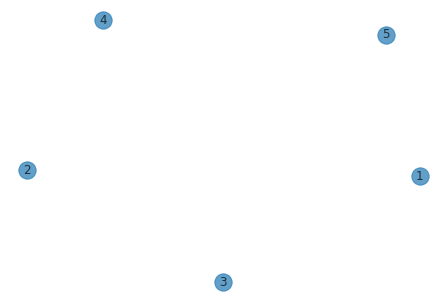

In [9]:
nx.draw(G, with_labels = True, alpha = 0.7)  # alpha defines the node opacity

#### 2. Edges
* Add on edge at a time

In [10]:
G.add_edge(1,2)

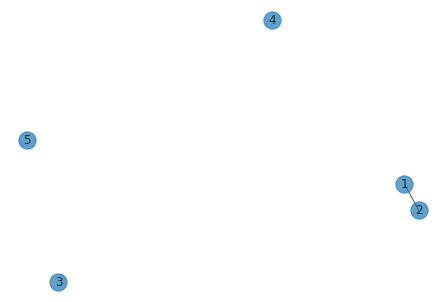

In [11]:
nx.draw(G, with_labels = True, alpha = 0.7)  # alpha defines the node opacity

* Add a list of edges

In [12]:
edges = [(1,2), (1,3), (4,6), (5,4), (2,3)]

In [13]:
G.add_edges_from(edges) # Or you can enter the list straight into the add_edges_from function

* You can also add edges with attributes with 3-tuble format `(node, node, {"weight": 3})`
* We will discuss edge attributes in more detail later. 

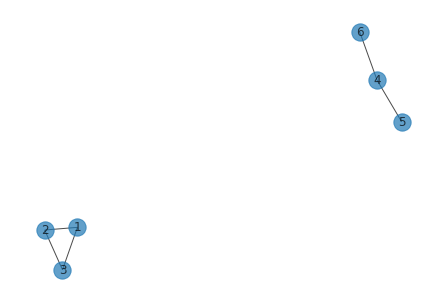

In [14]:
nx.draw(G, with_labels = True, alpha = 0.7)  # alpha defines the node opacity

* Note: Each time we draw a graph, the nodes have different positions

#### 3. Examining elements of a Graph

* **`G.nodes()`**: Returns the nodes in a graph
* **`G.edges()`**: Returns the edges in a graph
* **`G.degree()`**: Returns the number of edges adjacent to every node, or number of edges to specified node
* **`G.size()`**: Returns the number of edges or total of all edge weights.

In [15]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [16]:
list(G.nodes()) # Cast nodes into a list

[1, 2, 3, 4, 5, 6]

In [17]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (4, 6), (4, 5)])

In [18]:
list(G.edges()) # Cast edges into a list of tuples

[(1, 2), (1, 3), (2, 3), (4, 6), (4, 5)]

In [19]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1})

In [20]:
list(G.degree())

[(1, 2), (2, 2), (3, 2), (4, 2), (5, 1), (6, 1)]

In [21]:
G.degree(1)  # OR G.degree[1]

2

In [22]:
G.size()

5

* Build-in functions in **`networkx`**.
* A **complete graph** is one with every node has an edge to another node.

#### 4. Removing Graph Elements
* You remove nodes and edges in similar fashion as adding them: 
    * **`G.remove_node()`**: Remove a single node 
    * **`G.removes_nodes_from()`**: Remove a list of nodes 
    * **`G.remove_edge()`**: Remove a single edge 
    * **`G.remove_edges_from()`**: Remove a list of edges

#### 5. Node and Edge Types

* Nodes and Edges can be of any data type, though typically they are numbers or strings. 
* This is quite powerfull, but its abuse can lead to suprising behaviors unless someone is familiar with Python. 
* If in doubt, use **`convert_node_labels_to_integers()`** to obtain more traditional graph labels.

#### 6. Accessing Edges and Neighbouts 

* In addition to the G.edges() and G.adj(), we can access Edges and their neighbours using the subscript notation. 
* `G[1]` is the same as `G.adj[1]`

In [23]:
G[1]

AtlasView({2: {}, 3: {}})

In [24]:
G.adj[1]

AtlasView({2: {}, 3: {}})

In [25]:
list(G.adj[1])

[2, 3]

In [26]:
G[4][5] # You can get edge attributes

{}

* `G.adjacency()` and `G.adj_items())` returns information on the node neighbours

In [27]:
list(G.adjacency())

[(1, {2: {}, 3: {}}),
 (2, {1: {}, 3: {}}),
 (3, {1: {}, 2: {}}),
 (4, {6: {}, 5: {}}),
 (5, {4: {}}),
 (6, {4: {}})]

In [28]:
list(G.adj.items())

[(1, AtlasView({2: {}, 3: {}})),
 (2, AtlasView({1: {}, 3: {}})),
 (3, AtlasView({1: {}, 2: {}})),
 (4, AtlasView({6: {}, 5: {}})),
 (5, AtlasView({4: {}})),
 (6, AtlasView({4: {}}))]

* Create a weighted graph:

In [29]:
WG = nx.Graph()
WG.add_weighted_edges_from([(1,2,0.012), 
                            (1,3,0.75), 
                            (2,3, 1.2), 
                            (3,4,0.35)])

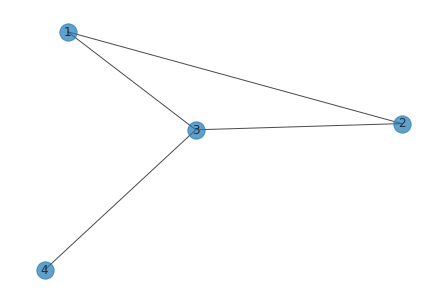

In [30]:
nx.draw(WG, with_labels=True, alpha=0.7)

* Convenient access to all Edges is achieved with the `edges` property

In [31]:
for u, v, w in WG.edges.data("weight"):
    print(f"({u}, {v}, {w})")

(1, 2, 0.012)
(1, 3, 0.75)
(2, 3, 1.2)
(3, 4, 0.35)


#### 7. Directed Graphs
* The **`DiGraph`** class provides additional methods and properties specific to directed edges, such as: 
    * **`DiGraph.out_edges`**
    * **`DiGraph.in_degree`**
    * **`DiGraph.predecessors`** and **`DiGraph.successors`** replaces the `neighbours` methods.

#### 9. Graph generators for classic graphs
* Complete graph of n nodes: 

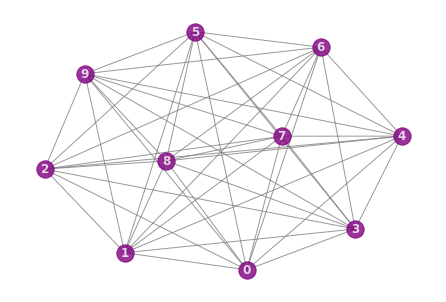

In [32]:
c = nx.complete_graph(10)
nx.draw(c, with_labels=True, alpha=0.8, 
        font_weight="bold", font_color="white", 
        edge_color="grey", node_color="purple")

In [33]:
print("Number of nodes:", c.order())
print("Number of edges:", c.size() )

Number of nodes: 10
Number of edges: 45


* Complete bipartite graph:

In [34]:
b = nx.complete_bipartite_graph(5, 10)

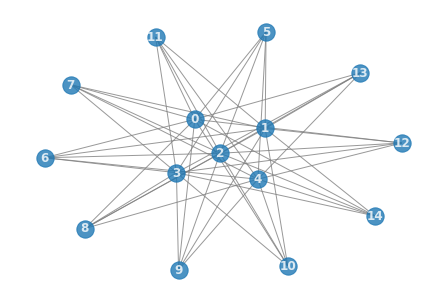

In [35]:
nx.draw(b, with_labels=True, alpha=0.8, 
        font_weight="bold", font_color="white", edge_color="grey")

* A **random graph** with edges = e and probability = p 
* Generates a graph with e edges and each node pas a probabilty p to be connected with another node

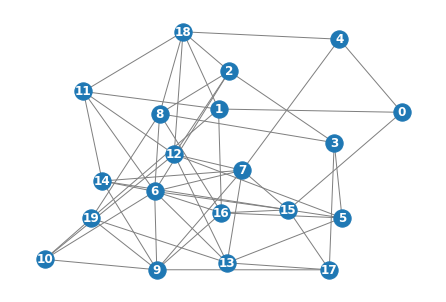

In [36]:
r = nx.gnp_random_graph(20, 0.25)
nx.draw(r, with_labels = True, edge_color="grey", font_weight="bold", font_color="white")

#### 10. Draw Graphs in Different Layouts

* Example graph: 

In [37]:
H = nx.DiGraph()
Nodes = ["0", "1", "2", "3", "1a", "1b", "1c", "2a", "2b", "2c", "3a", "3b", "3c"]
Edges = [("0","1", 1), ("0","2", 1), ("0","3", 1),
         ("1", "1a", 1), ("1","1b", 1), ("1","1c", 1), 
         ("2", "2a", 1), ("2","2b", 1), ("2","2c", 1), 
         ("3", "3a", 1), ("3","3b", 1), ("3","3c", 1)]

H.add_nodes_from(Nodes)
H.add_weighted_edges_from(Edges)

* Circural layout:

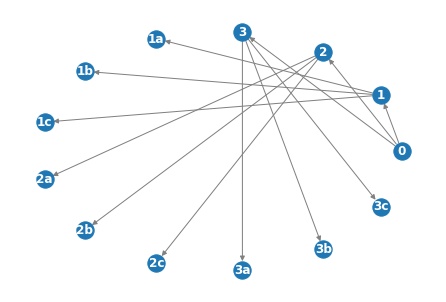

In [38]:
nx.draw_circular(H, with_labels=True, font_color="white", font_weight="bold", edge_color="grey")

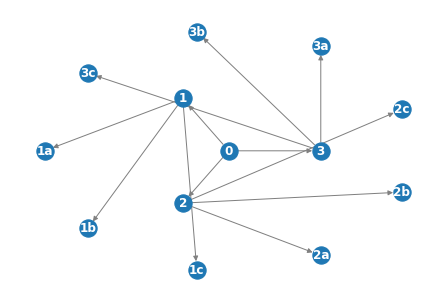

In [40]:
nx.draw_shell(H, with_labels=True, font_color="white", font_weight="bold", edge_color="grey", 
                 nlist=[["0"], ["1", "2", "3"], ["1a", "1b", "1c", "2a", "2b", "2c", "3a", "3b", "3c"]])

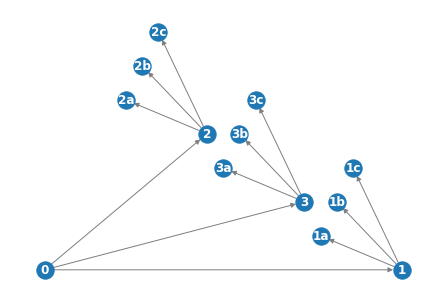

In [42]:
nx.draw_planar(H, with_labels=True, font_color="white", font_weight="bold", edge_color="grey")